In [ ]:
# Start writing code here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from collections import Counter

In [ ]:
fake_data = pd.read_csv("Fake.csv")
real_data = pd.read_csv("True.csv")
train_data = pd.read_csv("news.csv")

In [ ]:
#fake_data.insert(4, 'Fake', np.ones(fake_data.shape[0]))
fake_data[fake_data['text'].str.contains('\(Reuters\)')].shape

(9, 5)

In [ ]:
# real_data.insert(4, 'Fake', np.zeros(real_data.shape[0]))
display(real_data[real_data['text'].str.contains('\(Reuters\)')].shape)
real_data.shape

(21247, 5)

(21417, 5)

In [ ]:
full_data = pd.concat([real_data, fake_data], axis=0)
full_data = full_data.drop(columns = ['date', 'subject', 'title'])
X_train,X_test,y_train,y_test=train_test_split(full_data['text'], full_data['Fake'], test_size=0.2, random_state=7)

In [ ]:
full_data

,text,Fake
0,WASHINGTON (Reuters) - The head of a conservat...,0.0
1,WASHINGTON (Reuters) - Transgender people will...,0.0
2,WASHINGTON (Reuters) - The special counsel inv...,0.0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0.0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,1.0
23477,21st Century Wire says It s a familiar theme. ...,1.0
23478,Patrick Henningsen 21st Century WireRemember ...,1.0
23479,21st Century Wire says Al Jazeera America will...,1.0


# Missing Values

In [ ]:
pd.isnull(full_data).sum()

text    0
Fake    0
dtype: int64

In [ ]:
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data = shuffle(full_data)

# Model

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
y_train.shape

(35918,)

In [ ]:
pac = PassiveAggressiveClassifier(max_iter=60)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
score

0.9946547884187082

In [ ]:
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[4282,   23],
       [  25, 4650]])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


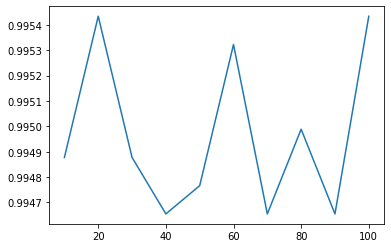

In [ ]:
scores = []
number_of_iterations = []
for iter in [i*10 for i in range(1, 11)]:
    pac = PassiveAggressiveClassifier(max_iter=iter)
    pac.fit(tfidf_train,y_train)
    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    number_of_iterations.append(iter)
    scores.append(score)
plt.plot(number_of_iterations, scores, )
plt.show()

# Findings/Visualizations of real and fake news

In [ ]:
# Start writing code here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords

fake_data = pd.read_csv("Fake.csv")
real_data = pd.read_csv("True.csv")
train_data = pd.read_csv("news.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#full_data = pd.concat([real_data, fake_data], axis=0)
real_data_frame = pd.DataFrame(real_data)
all_real_words = " ".join(real_data_frame["text"])

#all_real_words = all_real_words.translate({string.punctuation: ""})

all_real_words_list = all_real_words.split()
all_real_words_copy = all_real_words[:]

own_stop_words = {'said', 'would', 'the', 'said.', '-', '(reuters)', 'also'}


def is_stopword(word):
    return word.lower() not in set(stopwords.words('english')) and word.lower() not in own_stop_words

all_real_words_list = filter(is_stopword, all_real_words_list)
most_common_real_words = Counter(all_real_words_list).most_common(5);

print(most_common_real_words)



[('U.S.', 38271), ('Trump', 36461), ('President', 17112), ('United', 15030), ('government', 14667)]


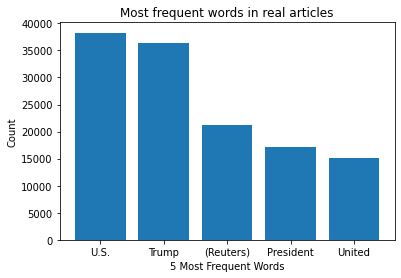

In [ ]:
most_common_real_words = [('U.S.', 38271), ('Trump', 36461), ('(Reuters)', 21239), ('President', 17112), ('United', 15030)]

word = [pair[0] for pair in most_common_real_words]
count = [pair[1] for pair in most_common_real_words]

#print(str(most_common_real_words))
#print(1)

plt.bar(word, count)
plt.xlabel("5 Most Frequent Words")
plt.ylabel("Count")
plt.title("Most frequent words in real articles")
plt.show()

In [ ]:
fake_data_frame = pd.DataFrame(fake_data)
all_fake_words = " ".join(fake_data_frame["text"]).split()
fake_real_words_copy = all_real_words[:]

def is_stopword(word):
    return word.lower() not in set(stopwords.words('english')) and word.lower() not in own_stop_words

all_fake_words = filter(is_stopword, all_fake_words)
most_common_fake_words = Counter(all_fake_words).most_common(5);

print(most_common_fake_words)




KeyboardInterrupt: 

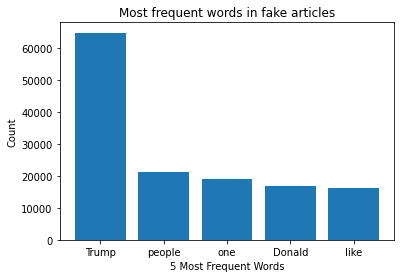

In [ ]:
word = [pair[0] for pair in most_common_fake_words]
count = [pair[1] for pair in most_common_fake_words]

plt.bar(word, count)
plt.xlabel("5 Most Frequent Words")
plt.ylabel("Count")
plt.title("Most frequent words in fake articles")
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
realLength = len(all_real_words)

shuffle(real_data)
shuffle(fake_data)

real_data_frame = pd.DataFrame(real_data)
fake_data_frame = pd.DataFrame(fake_data)

all_real_words = " ".join(real_data_frame["text"])
all_fake_words = " ".join(fake_data_frame["text"])
fakeLength = len(all_fake_words)
print(realLength)
print(fakeLength)

51064092
59838891


In [ ]:
analyzer = SentimentIntensityAnalyzer()

randomLen = int(realLength//50)

real_emotion = analyzer.polarity_scores(all_real_words[:randomLen])
fake_emotion = analyzer.polarity_scores(all_fake_words[:randomLen])

{'neg': 0.079, 'neu': 0.821, 'pos': 0.1, 'compound': 1.0}
{'neg': 0.135, 'neu': 0.763, 'pos': 0.103, 'compound': -1.0}
[0.1, 0.821, 0.079]


TypeError: can't multiply sequence by non-int of type 'float'

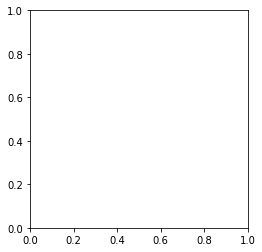

In [ ]:
real_neu = real_emotion['neu']
fake_neu = fake_emotion['neu']

real_pos = real_emotion['pos']
fake_pos = fake_emotion['pos']

real_neg = real_emotion['neg']
fake_neg = fake_emotion['neg']

real_data = [real_pos, real_neu, real_neg]
fake_data = [fake_pos, fake_neu, fake_neg]

labels = 'positive score', 'neutral score', 'negative score'

print(real_emotion)
print(fake_emotion)
print(real_data)

plt.pie(real_data, labels, autopct='%1.1f%%')
plt.title("Real data emotion scores")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae0ccba1-56e9-42e8-b1f9-70bdadc44a9d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>